In [1]:
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

In [5]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

In [6]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
%matplotlib inline
np.random.seed(1)

In [8]:
y1=tf.constant(35,name='pop')
y2=tf.constant(39,name='y')
loss=tf.Variable(y2-y1,name='loss')
init=tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    print(session.run(loss))

4


In [9]:
a=tf.constant(3)
b=tf.constant(5)
c=tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [10]:
sess=tf.Session()
print(sess.run(c))

15


In [11]:
x=tf.placeholder(tf.int64,name='x')
print(sess.run(2*x,feed_dict={x:3}))
sess.close()

6


In [12]:
type(data)

mnist.MNIST

In [13]:
# The images are stored in one-dimensional arrays of this length.
img_size_flat = data.img_size_flat

# Tuple with height and width of images used to reshape arrays.
img_shape = data.img_shape

# Number of classes, one class for each of 10 digits.
num_classes = data.num_classes

(784,) (55000, 10) (10000, 784) (10000, 10)


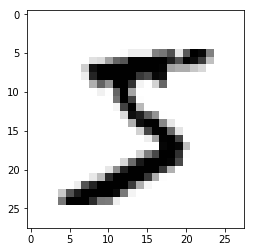

In [26]:
plt.imshow(data.x_train[0].reshape(img_shape), cmap='binary')
print(data.x_train[0].shape,data.y_train.shape,data.x_test.shape,data.y_test.shape)

In [61]:
X_train=data.x_train.T
X_test=data.x_test.T
Y_train=data.y_train.T
Y_test=data.y_test.T

In [30]:
print(Y_test[0].shape)

(10,)


In [29]:
def create_placeholders(n_x,n_y):
    X=tf.placeholder(tf.float32,shape=[n_x,None])
    Y=tf.placeholder(tf.float32,shape=[n_y,None])
    return X,Y

In [31]:
X,Y=create_placeholders(784,10)
print('X = '+str(X))
print('Y = '+str(Y))

X = Tensor("Placeholder:0", shape=(784, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(10, ?), dtype=float32)


In [32]:
def initialize_parameters():
    tf.set_random_seed(0)
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable('W1',[25,784],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable('b1',[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable('W2',[12,25],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable('b2',[12,1],initializer=tf.zeros_initializer())
    W3 = tf.get_variable('W3',[10,12],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable('b3',[10,1],initializer=tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [33]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters=initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 784) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [34]:
def forward_propagation(X,parameters):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    W3=parameters['W3']
    b3=parameters['b3']
    
    Z1=tf.add(tf.matmul(W1,X),b1)
    A1=tf.nn.relu(Z1)
    Z2=tf.add(tf.matmul(W2,A1),b2)
    A2=tf.nn.relu(Z2)
    Z3=tf.add(tf.matmul(W3,A2),b3)
    
    return Z3   

In [38]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=create_placeholders(784,10)
    parameters=initialize_parameters()
    Z3=forward_propagation(X,parameters)
    print('Z3 = '+str(Z3))

Z3 = Tensor("Add_2:0", shape=(10, ?), dtype=float32)


In [39]:
def compute_cost(Z3,Y):
    logits=tf.transpose(Z3)
    labels=tf.transpose(Y)
    
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    return cost

In [40]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=create_placeholders(784,10)
    parameters=initialize_parameters()
    Z3=forward_propagation(X,parameters)
    cost=compute_cost(Z3,Y)
    print ('cost = '+str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [72]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 100, minibatch_size = 500, print_cost = True):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed=3
    (n_x,m)=X_train.shape
    n_y=Y_train.shape[0]
    costs=[]
    
    X,Y=create_placeholders(n_x,n_y)
    
    parameters=initialize_parameters()
    
    Z3=forward_propagation(X,parameters)
    
    cost=compute_cost(Z3,Y)
    
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init=tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            epoch_cost=0
            
            num_minibatches=int(m/minibatch_size)
            minibatches=random_mini_batches(X_train,Y_train,minibatch_size,seed)
            for minibatch in minibatches:
                (minibatch_X,minibatch_Y)=minibatch
                _,minibatch_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                
                epoch_cost+= minibatch_cost/num_minibatches
                
            if print_cost==True and epoch%10==0:
                print('Cost after epoch %i : %f'%(epoch,epoch_cost))
            if print_cost==True and epoch%5==0:
                costs.append(epoch_cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations per tens')
        plt.title('learning rate = ' + str(learning_rate))
        plt.show()
        
        parameters=sess.run(parameters)
        print('parameters trained')
        
        correct_predictions=tf.equal(tf.argmax(Z3),tf.argmax(Y))
        
        accuracy=tf.reduce_mean(tf.cast(correct_predictions,'float'))
        
        print('train accuracy : ', accuracy.eval({X:X_train,Y:Y_train}))
        print ('test accuracy : ', accuracy.eval({X:X_test,Y:Y_test}))
        
        return parameters

Cost after epoch 0 : 2.157439
Cost after epoch 10 : 0.595298
Cost after epoch 20 : 0.338211
Cost after epoch 30 : 0.276224
Cost after epoch 40 : 0.241504
Cost after epoch 50 : 0.217400
Cost after epoch 60 : 0.199485
Cost after epoch 70 : 0.185218
Cost after epoch 80 : 0.173593
Cost after epoch 90 : 0.163756


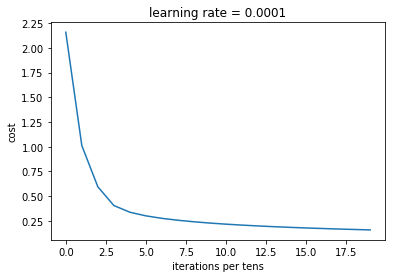

parameters trained
train accuracy :  0.955182
test accuracy :  0.9491


In [73]:
parameters=model(X_train,Y_train,X_test,Y_test)